# Naive Bayes, SVM

We will cover the following:
- Dataset splitting
- Naive Bayes
- SVM

## Dataset Splitting

Definition: A technique to evaluate the performance of a model by dividing the data into k subsets (folds).

Process:
- Split the dataset into k equal-sized folds.
- Train the model on k-1 folds.
- Validate the model on the remaining fold.
- Repeat the process k times, each time with a different fold as the validation set.
- Average the results to get the final performance metric.


In [31]:
# Import necessary libraries
from sklearn.model_selection import KFold
import numpy as np
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Print the split indices for train and validation sets in each fold
for train_index, val_index in kf.split(X):
    print(f"TRAIN indices: {train_index}, VALIDATION indices: {val_index}")


# Iterate through each fold and split the dataset
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
    print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


TRAIN indices: [  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  20  21
  22  23  24  25  27  28  32  33  34  35  37  38  39  40  41  42  43  44
  46  47  48  49  50  51  52  53  54  57  58  59  60  61  62  63  65  66
  67  70  71  72  74  75  77  79  80  81  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 109 111
 112 113 114 115 116 117 119 120 121 122 123 124 125 126 129 130 133 134
 135 136 137 138 139 140 142 144 146 147 148 149], VALIDATION indices: [  9  12  18  19  26  29  30  31  36  45  55  56  64  68  69  73  76  78
  82 104 108 110 118 127 128 131 132 141 143 145]
TRAIN indices: [  1   2   3   5   6   7   8   9  12  13  14  17  18  19  20  21  23  24
  25  26  29  30  31  33  34  35  36  37  38  39  41  43  45  46  47  48
  49  50  52  53  54  55  56  57  58  59  61  62  63  64  68  69  70  71
  72  73  74  76  77  78  79  80  82  83  84  87  88  89  90  91  92  93
  94  95  97  98  99 100 101 102 103 104 106 1

| **Method**                  | **Advantages**                                                   | **Disadvantages**                                                  |
|-----------------------------|------------------------------------------------------------------|--------------------------------------------------------------------|
| **Train/Validation/Test**    | Simple to implement and fast to run.                             | Might be sensitive to how the data is split, leading to biased results. |
| **K-Fold Cross Validation**  | More reliable and uses the full dataset for both training and validation. | Computationally more expensive due to multiple model evaluations.   |



## SVM and Naive Bayes in Python

We work with a dataset describing [Italian wine samples](https://archive.ics.uci.edu/ml/datasets/Wine). 

We will use as features the alcohol content of the digits and its Malic acid content to predict the grape type (cultivar).


In [32]:
import sklearn.utils as utils
import sklearn.svm as svm
import sklearn.model_selection as model_selection
import sklearn.datasets as datasets



In [33]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

# Create a DataFrame with the feature data
wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Optionally, rename the columns for easier reference
wine.columns = ['Alcohol',
                'Malic acid',
                'Ash',
                'Alcalinity of ash',
                'Magnesium',
                'Total phenols',
                'Flavanoids',
                'Nonflavanoid phenols',
                'Proanthocyanins',
                'Color intensity',
                'Hue',
                'OD280/OD315 of diluted wines',
                'Proline']

# Features: Select 'Alcohol' and 'Malic acid' columns
X = wine[['Alcohol', 'Malic acid']].values

# Target: Use the wine type/class as the target (y)
y = wine_data.target  # This contains the wine classes

# Now X contains your selected features, and y contains the target wine classes



We'll first fit a linear SVM to the data.


In [34]:


#| code-fold: false
np.random.seed(0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = 0.5)



#| code-fold: false
svc = svm.SVC(kernel = 'linear')
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
print(f'Accuracy of SVM on test set: {svc.score(X_test, y_test):0.3f}')



Accuracy of SVM on test set: 0.764



---

Let's visualize the decision boundaries.



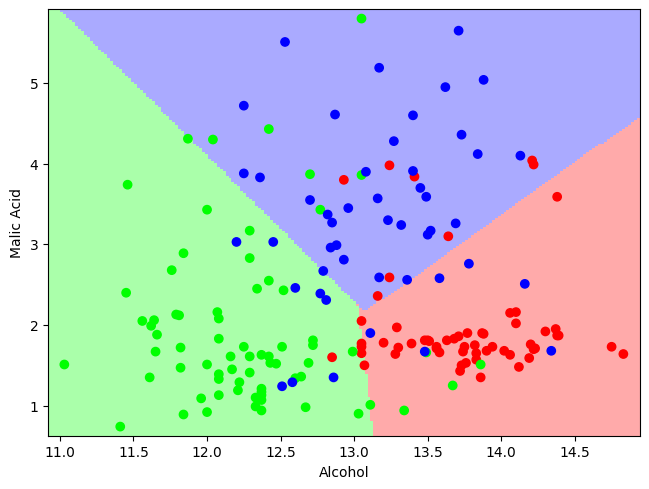

In [35]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    
    try:
        X, y = X.values, y.values
    except AttributeError:
        pass
    
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.tight_layout()
plt.show()



#| fig-align: center
plot_estimator(svc, X, y)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()




---

Note that in practice we should pay attention to feature scaling when using SVMs. We haven't done that here.

As described already, the SVM gets its name from the samples in the dataset from each class that lies closest to the other class. 

These training samples are called "support vectors" because changing their position in the $d$-dimensional feature space would change the location of the decision boundary.

In `scikit-learn`, the indices of the support vectors for each class can be found in the `support_vectors_` attribute of the SVC object. 

---

Here, we will use just two of the three classes for clarity. 

The support vectors are circled.


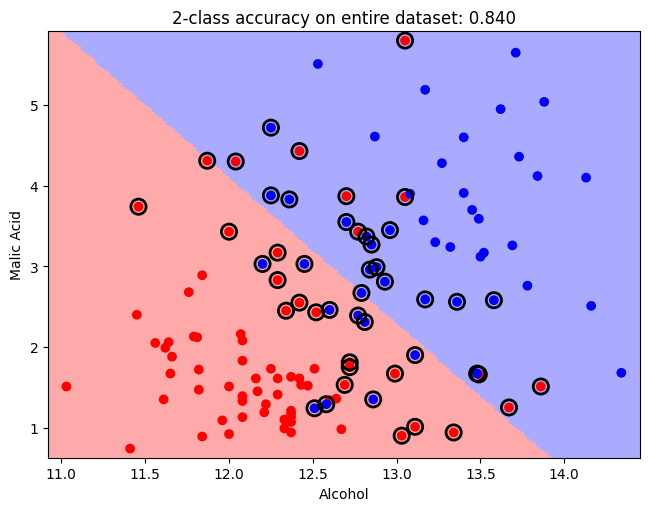

In [36]:


#| fig-align: center
# Extract classes 1 and 2
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]

plot_estimator(svc, X, y)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.scatter(svc.support_vectors_[:, 0], 
           svc.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           edgecolors = 'k',
           linewidths=2,
           zorder=10)
plt.title(f'2-class accuracy on entire dataset: {svc.score(X, y):0.3f}')
plt.show()




## Regularization

Since the classes are not linearly separable, there are nonzero slack variables, each of which is associated with a support vector.

Therefore we should consider how regularization is tuned via the $C$ parameter. 

In practice, a large $C$ value means that the number of support vectors is small (less regularization, more model complexity), while a small $C$ implies many support vectors (more regularization, less model complexity). 

`scikit-learn` sets a default value of $C=1$.

## Large $C$


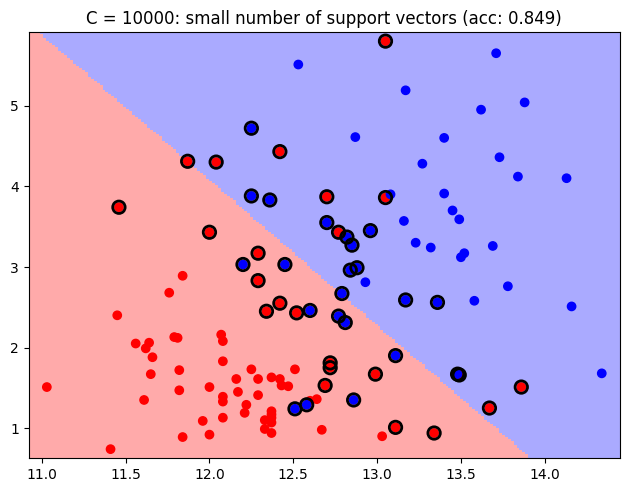

In [37]:


#| fig-align: center
svc = svm.SVC(kernel='linear', C=1e4)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, 
            facecolors='none', edgecolors = 'k', linewidths=2, zorder=10)
plt.title(f'C = 10000: small number of support vectors (acc: {svc.score(X, y):0.3f})')
plt.show()




## Small $C$


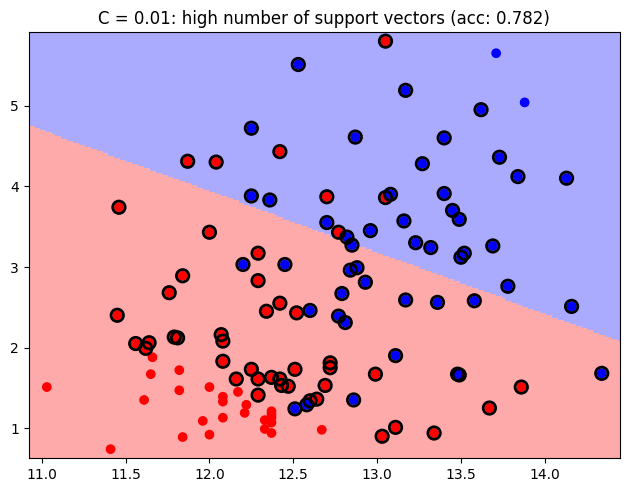

In [38]:


#| fig-align: center
svc = svm.SVC(kernel='linear', C=1e-2)
plot_estimator(svc, X, y)
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, 
            facecolors='none', edgecolors = 'k', linewidths=2, zorder=10)
plt.title(f'C = 0.01: high number of support vectors (acc: {svc.score(X, y):0.3f})')
plt.show()




## Kernels

We can also choose from a suite of available kernels:

* linear, 
* poly, 
* rbf, 
* sigmoid.

We can also pass in a custom kernel. 

Note that the radial basis function (rbf) kernel is just a Gaussian kernel, but with parameter $\gamma = \frac{1}{\sigma^2}$.

## Linear Kernel


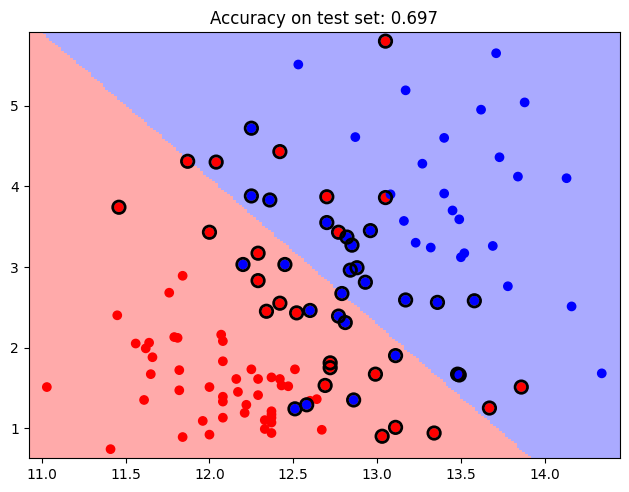

In [39]:


#| fig-align: center
svc_lin = svm.SVC(kernel = 'linear')
plot_estimator(svc_lin, X, y)
plt.scatter(svc_lin.support_vectors_[:, 0], svc_lin.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors = 'k', linewidths=2, zorder=10)
plt.title('Linear kernel')
y_pred_test = svc_lin.predict(X_test)
plt.title(f'Accuracy on test set: {svc.score(X_test, y_pred_test):0.3f}')
plt.show()




## Polynomial Kernel


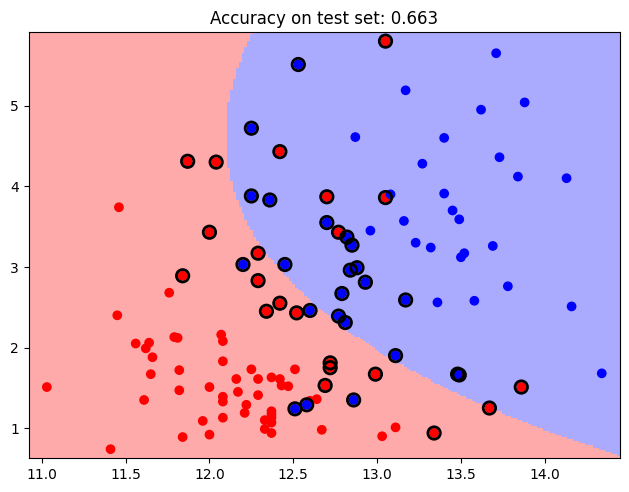

In [40]:


#| fig-align: center
svc_poly = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc_poly, X, y)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors = 'k', linewidths=2, zorder=10)
plt.title('Polynomial kernel')
y_pred_test = svc_poly.predict(X_test)
plt.title(f'Accuracy on test set: {svc.score(X_test, y_pred_test):0.3f}')
plt.show()




## RBF Kernel


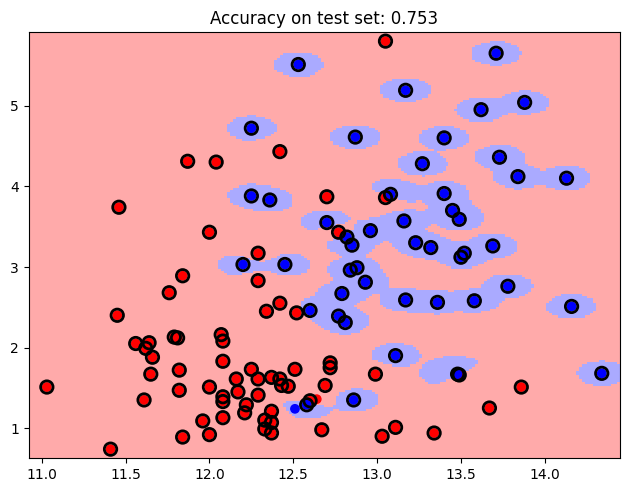

In [41]:


#| fig-align: center
svc_rbf = svm.SVC(kernel='rbf', gamma=100, C = 1e2)
plot_estimator(svc_rbf, X, y)
plt.scatter(svc_rbf.support_vectors_[:, 0], svc_rbf.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors = 'k', linewidths=2, zorder=10)
plt.title('RBF kernel')
y_pred_test = svc_rbf.predict(X_test)
plt.title(f'Accuracy on test set: {svc.score(X_test, y_pred_test):0.3f}')
plt.show()




## Cross-Validation

Let's evaluate our choice of hyperparameter $C$.

We have seen how to tune hyperparameters already using `model_selection.train_test_split()`.

Now we'll use a utility `model_selection.cross_val_score()` which will automatically do $k$-fold cross validation for us, for a single hyperparmeter.


In [42]:


#| code-fold: false
f = svm.SVC(kernel = 'linear', C = 1)
scores = model_selection.cross_val_score(f, 
                                         wine[['Alcohol', 'Malic acid']], 
                                         wine_data.target, 
                                         cv = 5)

print(f'Scores: {scores}')
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std()/np.sqrt(5):0.2f})')



Scores: [0.69444444 0.80555556 0.80555556 0.71428571 0.71428571]
Accuracy: 0.75 (+/- 0.02)



---

Let's use this to do a grid search to tune $C$.


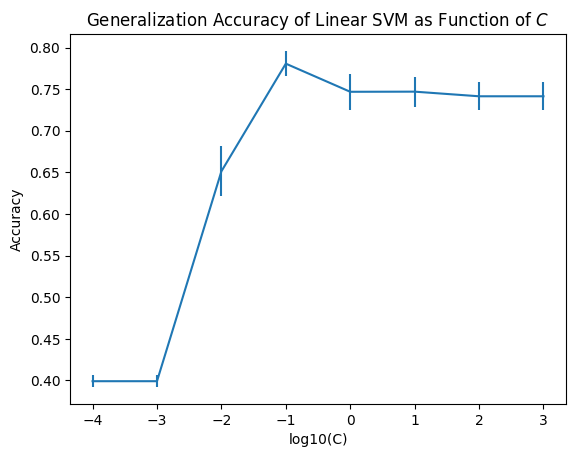

In [44]:


means = []
stds = []
folds = 5
C_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_val in C_vals:
    f = svm.SVC(kernel='linear', C = C_val)
    scores = model_selection.cross_val_score(f, wine[['Alcohol', 'Malic acid']], wine_data.target, cv = folds)
    means.append(np.mean(scores))
    stds.append(np.std(scores) / np.sqrt(folds))
acc = np.array(means)
stderr = np.array(stds)
C_s = np.array(C_vals)



#| fig-align: center
plt.errorbar(np.log10(C_vals), acc, stderr)
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')
plt.title(r'Generalization Accuracy of Linear SVM as Function of $C$')
plt.show()




## SVM and NB: the Iris Dataset

To compare SVM and Naive Bayes, we'll look at the Iris dataset. We will use two features for visualization.

We will not hold out data since we're just interested in the shapes of the decision boundaries.


In [46]:

iris = datasets.load_iris()
X = iris.data[:, :2]                     
y = iris.target

C = 1.0  

svc = svm.SVC(kernel = 'linear', C = C).fit(X, y)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(X, y)
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = C).fit(X, y)




---

To use Naive Bayes, one has to treat all the features as either

* Gaussian
* Multinomial (Categorical)
* Binary

`scikit-learn` provides a Naive Bayes classifier for each of these cases.

We'll use the Gaussian.

---


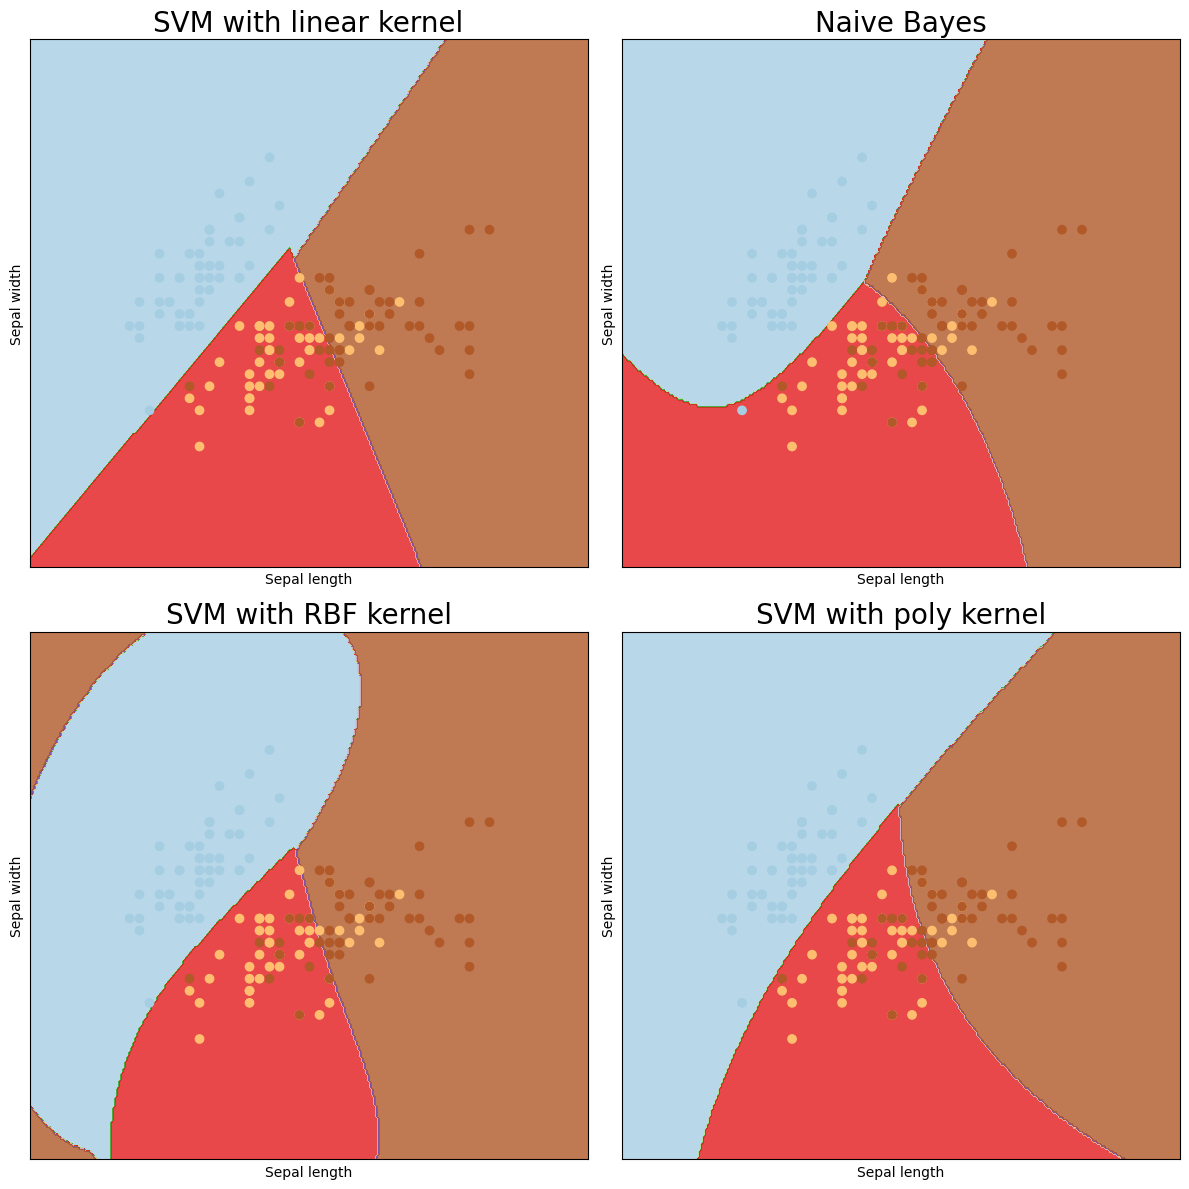

In [47]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X, y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM with linear kernel',
          'Naive Bayes',
          'SVM with RBF kernel', 'SVM with poly kernel']

fig = plt.figure(figsize=(12,12))

for i, clf in enumerate((svc, gnb, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i], size = 20)

plt.tight_layout()
plt.show()
